In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('diabetes.csv')

data.isnull().sum()

data.to_csv('cleaned.csv')

Text(0, 0.5, 'Glucose')

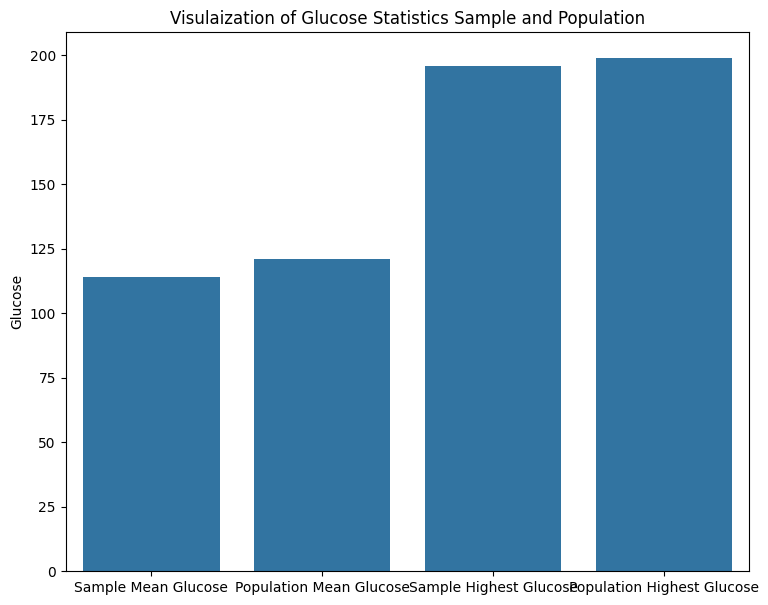

In [13]:

def bootstrap_sampling(data, n_samples, sample_size):
    btstrap_means = []
    btstrap_std = []
    btstrap_percentile = []

    for _ in range(n_samples):
        sample_dt = data.sample(n=sample_size, replace=True)
        btstrap_means.append(sample_dt['BloodPressure'].mean())
        btstrap_std.append(sample_dt['BloodPressure'].std())
        btstrap_percentile.append(np.percentile(sample_dt['BloodPressure'], 98))

    return btstrap_means, btstrap_std, btstrap_percentile


np.random.seed(50)

# 2(a)
sample_dt = data.sample(n=25)
glucose_sample_mean = sample_dt['Glucose'].mean()
glucose_sample_highest = sample_dt['Glucose'].max()
glucose_population_mean = data['Glucose'].mean()
glucose_population_highest = data['Glucose'].max()


plt.figure(figsize=(30, 7))
plt.subplot(1, 3, 1)
sns.barplot(x=['Sample Mean Glucose', 'Population Mean Glucose', 'Sample Highest Glucose', 'Population Highest Glucose'],
            y=[glucose_sample_mean, glucose_population_mean, glucose_sample_highest, glucose_population_highest])
plt.title('Visulaization of Glucose Statistics Sample and Population')
plt.ylabel('Glucose')



Text(0, 0.5, 'BMI')

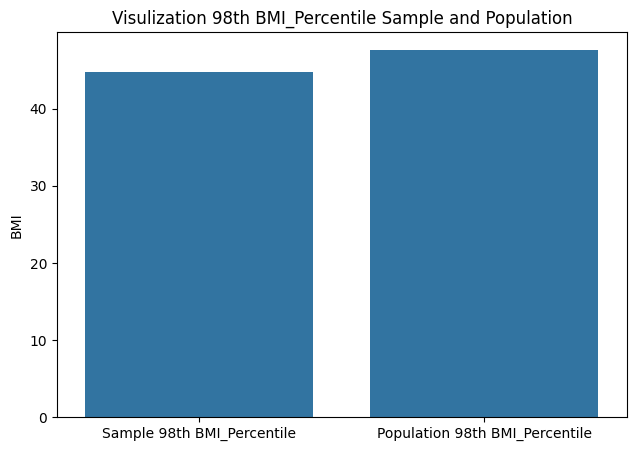

In [14]:
plt.figure(figsize=(25, 5))
#2(b)
sample_per98th = np.percentile(sample_dt['BMI'], 98)
population_per98th = np.percentile(data['BMI'], 98)

plt.subplot(1, 3, 2)
sns.barplot(x=['Sample 98th BMI_Percentile', 'Population 98th BMI_Percentile'],
            y=[sample_per98th, population_per98th])
plt.title('Visulization 98th BMI_Percentile Sample and Population')
plt.ylabel('BMI')

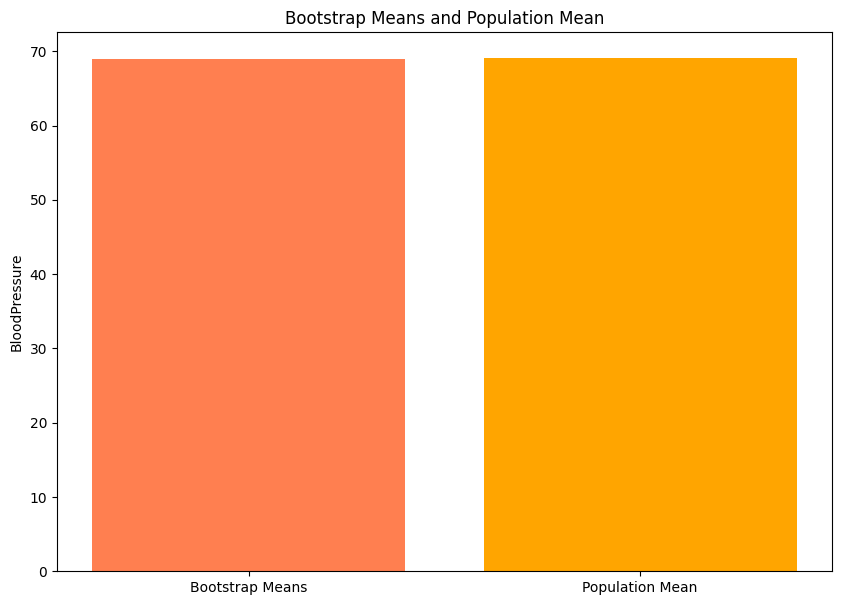

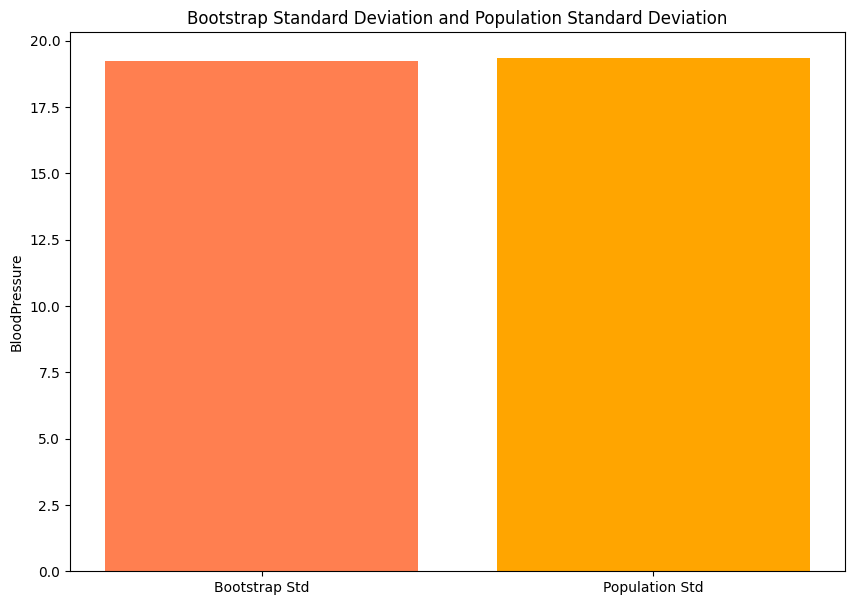

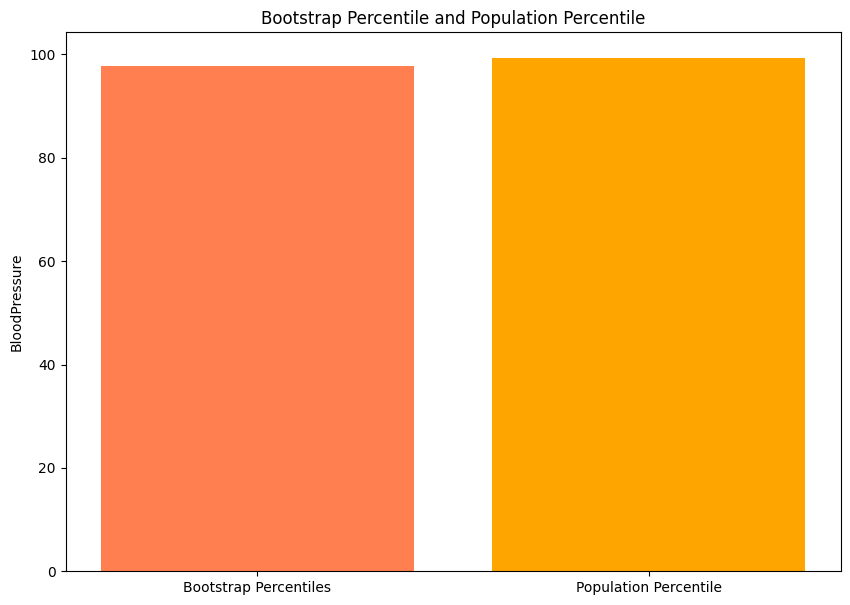

In [15]:
#2(c)
n_samples = 500
sample_size = 150
bootstrap_means, bootstrap_std, bootstrap_percentile = bootstrap_sampling(data, n_samples, sample_size)
population_mean_bp = data['BloodPressure'].mean()
population_std_bp = data['BloodPressure'].std()
population_percentile_98_bp = np.percentile(data['BloodPressure'], 98)


plt.figure(figsize=(10, 7))
plt.bar('Bootstrap Means', np.mean(bootstrap_means), color='coral', label='Bootstrap Means')
plt.bar('Population Mean', population_mean_bp, color='orange', label='Population Mean')
plt.ylabel('BloodPressure')
plt.title('Bootstrap Means and Population Mean')
plt.show()

plt.figure(figsize=(10, 7))
plt.bar('Bootstrap Std', np.mean(bootstrap_std), color='coral')
plt.bar('Population Std', population_std_bp, color='orange')
plt.ylabel('BloodPressure')
plt.title('Bootstrap Standard Deviation and Population Standard Deviation')
plt.show()

plt.figure(figsize=(10, 7))
plt.bar('Bootstrap Percentiles', np.mean(bootstrap_percentile), color='coral')
plt.bar('Population Percentile', population_percentile_98_bp, color='orange')
plt.ylabel('BloodPressure')
plt.title('Bootstrap Percentile and Population Percentile')
plt.show()
